<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/Copy_of_AML_Assessment_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DATA PROCESSING FOR MACHINE LEARNING##

In [5]:
# latest version of sklearn (to have access to recent features)
!pip install --upgrade scikit-learn==1.4.0 -q

In [87]:
!pip install category_encoders -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [94]:
# Import necessary libraries

import sklearn
# this makes is easier for getting dataframes by default as input/output of
# sklearn pipelines
sklearn.set_config(transform_output="pandas")

%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) }, style='ticks', color_codes=True, font_scale=0.8
)

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer


from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

from sklearn.metrics import PredictionErrorDisplay

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder

from sklearn.preprocessing import MinMaxScaler

In [7]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
#  load and view the first 5 rows
df_auto = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adverts.csv')


**Detect and Deal with Errorneous Values**

In [9]:
# Inspect dataframe
df_auto.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


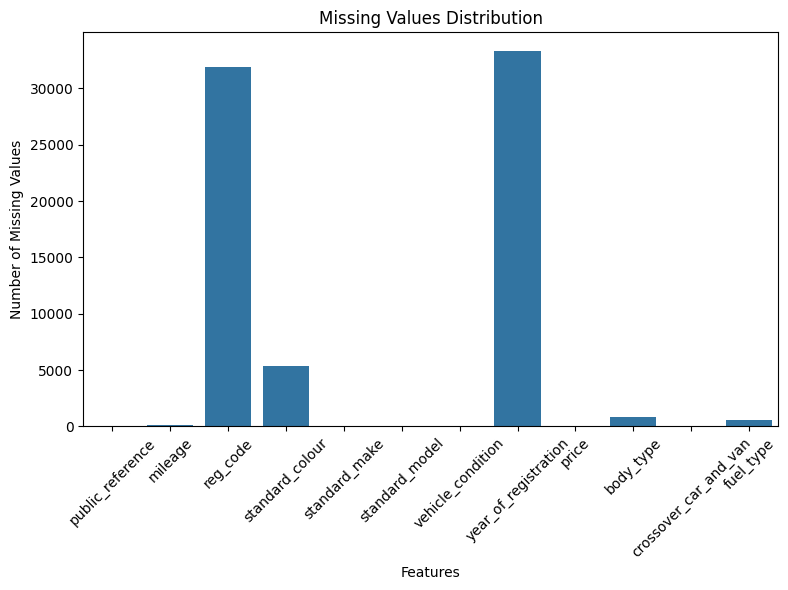

In [10]:
# Check for missing values in the DataFrame
missing_values = df_auto.isnull().sum()

# Visualize the missing values using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Missing Values Distribution')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
# Adjust layout
plt.tight_layout()
plt.show()


In [11]:
# get dataframe info to check for missing information
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [12]:
# Statistically describe numerical features
df_auto.describe().T

,count,mean,std,min,25%,50%,75%,max
public_reference,402005.0,2.020071e+14,1.691662e+10,2.013072e+14,2.020090e+14,2.020093e+14,2.020102e+14,2.020110e+14
mileage,401878.0,3.774360e+04,3.483172e+04,0.000000e+00,1.048100e+04,2.862950e+04,5.687575e+04,9.999990e+05
year_of_registration,368694.0,2.015006e+03,7.962667e+00,9.990000e+02,2.013000e+03,2.016000e+03,2.018000e+03,2.020000e+03
price,402005.0,1.734197e+04,4.643746e+04,1.200000e+02,7.495000e+03,1.260000e+04,2.000000e+04,9.999999e+06


In [13]:
# Check if mileage = 0 is consstent with new vehicle condition
df_auto[df_auto["mileage"] == 0.0].head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
19,202008272998331,0.0,NaN,White,Volkswagen,T-Cross,NEW,NaN,25000,SUV,False,Petrol
37,202001306737473,0.0,NaN,White,Fiat,Panda,NEW,NaN,13999,Hatchback,False,Petrol
44,202003178531910,0.0,NaN,NaN,Honda,Civic,NEW,NaN,19495,Hatchback,False,Petrol
45,202003318812338,0.0,NaN,Grey,Volvo,S60,NEW,NaN,40264,Saloon,False,Petrol


In [14]:
# check unique values and counts for reg_code and year_of_registration
reg_year_code_count = df_auto[["reg_code", "year_of_registration"]].value_counts()
reg_year_code_count

reg_code  year_of_registration
17        2017.0                  36560
67        2017.0                  27781
18        2018.0                  21490
66        2016.0                  20686
16        2016.0                  19908
                                  ...  
59        2020.0                      1
61        1961.0                      1
          2014.0                      1
          2018.0                      1
s         2001.0                      1
Name: count, Length: 283, dtype: int64

In [15]:
# Check unique values and counts for categorical features
cat_features_df = df_auto.drop(columns=['public_reference', 'mileage', 'year_of_registration', 'price'])
counts = cat_features_df.value_counts()
counts

reg_code  standard_colour  standard_make  standard_model  vehicle_condition  body_type    crossover_car_and_van  fuel_type
17        Black            Volkswagen     Polo            USED               Hatchback    False                  Petrol       252
          White            Volkswagen     Polo            USED               Hatchback    False                  Petrol       190
67        Red              Toyota         AYGO            USED               Hatchback    False                  Petrol       187
          Blue             Nissan         Qashqai         USED               SUV          False                  Petrol       181
          Black            Volkswagen     Polo            USED               Hatchback    False                  Petrol       178
                                                                                                                             ... 
53        Grey             MINI           Hatch           USED               Hatchback    False  

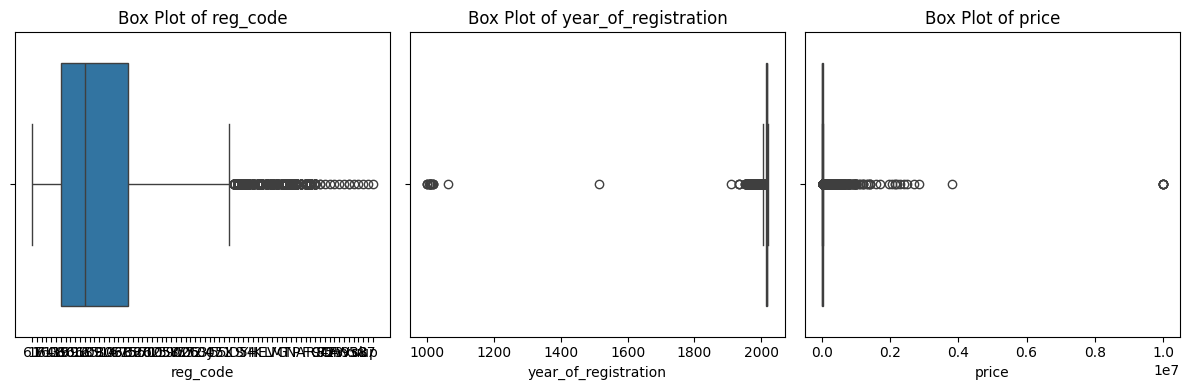

In [23]:
# Box plots for numerical features and target outcome.

sel_feat_target = ["reg_code", "year_of_registration", "price"]

# Set up a 1x4 subplot layout
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# iterate over pair of aligned vectors
for i, column in enumerate(df_auto[sel_feat_target].columns):
  sns.boxplot(x=df_auto[sel_feat_target][column], ax=axes[i], showfliers=True)
  axes[i].set_title(f'Box Plot of {column}')
  axes[i].set_xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

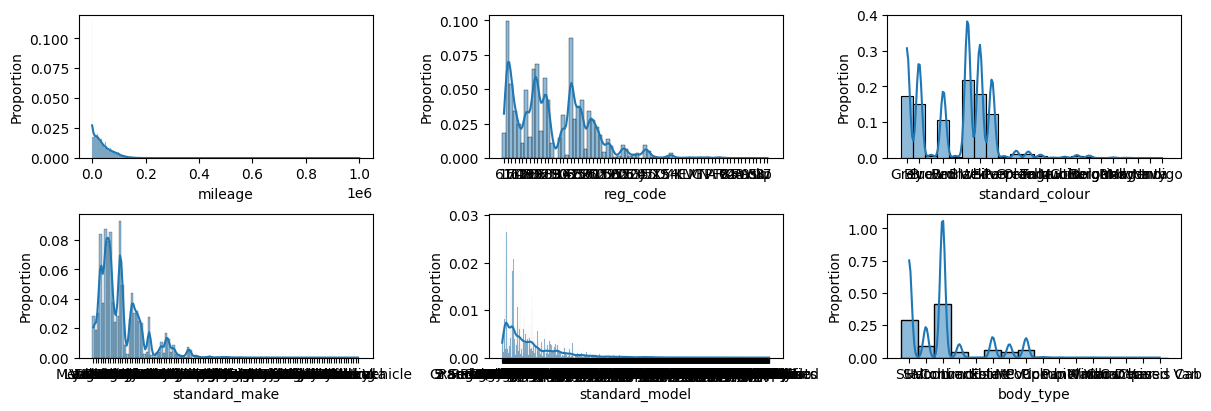

In [38]:
# Show distribution of some the predictors
cols = df_auto.drop(columns = ["price","public_reference", "crossover_car_and_van", "vehicle_condition", "year_of_registration","fuel_type"]).columns
n_cols = 3
n_rows = 2
fig, axs = plt.subplots(
    n_rows, n_cols, figsize=(12, n_rows*2), constrained_layout=True
)
# iterating over pairs of aligned vectors...
for col, ax in zip(cols[:6], axs.ravel()):
    sns.histplot(x=df_auto[col], stat='proportion', common_norm=False, kde=True, ax=ax);

**Observation**
- The data frame contained some missing values in mileage, reg_code, standard_colour, year_of_registration, body_type, and fuel_type features.
- Some of these missing values were due to new cars whose mileage, reg_code, and year_of_registration were recorded as zero and “NaN” (not a number) respectively.
- There were also some errors in the year_of_registration and the reg_code.
- Mileage is positively skewed with outliers as shown by its descriptive statistics, histplot, and boxplot.
- Year-of-registration is negatively skewed with outliers as shown by its descriptive statistics and boxplot.

**Way Out**
- Zero values in mileage are not treated as missing values because they represent mileage for new cars.
- Mode imputation strategy is used for filling in missing values for year_of_registration because it is more robust to the outliers in its distribution.
- Mean imputation strategy is used to fill missing values for mileage.
- Inter-quantile-range (IQR) strategy is used to filter outliers
- IQR strategy provides a robust approach to identify and handle outliers
- Reg_code features is dropped because it contains same information as
  year_of_registration.
- Crossover_car_and_van is dropped for being non-informative while
  public_reference dropped for high cardinality.




In [45]:
df_auto.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [47]:
# drop non-informative and high cardinality columns
df = df_auto
df = df.drop(columns=["public_reference", "reg_code", "crossover_car_and_van"])
df.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type
0,0.0,Grey,Volvo,XC90,NEW,NaN,73970,SUV,Petrol Plug-in Hybrid
1,108230.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,Diesel
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,Petrol
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,Diesel
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,Diesel


In [51]:
# Fill in missing values
mean = df["mileage"].mean().round(1)
df['mileage'] = df_auto["mileage"].replace(np.nan, mean )

other_feat = ['standard_colour', 'standard_make','standard_model','vehicle_condition', 'body_type','fuel_type', 'year_of_registration']

mode = df[other_feat].mode().iloc[0]
df[other_feat] = df[other_feat].replace(np.nan, mode )



In [53]:
df.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,fuel_type
0,0.0,Grey,Volvo,XC90,NEW,2017.0,73970,SUV,Petrol Plug-in Hybrid
1,108230.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,Diesel
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,Petrol
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,Diesel
4,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,Diesel


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   mileage               402005 non-null  float64
 1   standard_colour       402005 non-null  object 
 2   standard_make         402005 non-null  object 
 3   standard_model        402005 non-null  object 
 4   vehicle_condition     402005 non-null  object 
 5   year_of_registration  402005 non-null  float64
 6   price                 402005 non-null  int64  
 7   body_type             402005 non-null  object 
 8   fuel_type             402005 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 27.6+ MB


In [58]:
# Remove outliers using IQR Strategy for mileage

# Calculate the first quartile (Q1)
Q1 = df['mileage'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['mileage'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
mileage_outliers = df[(df['mileage'] < lower_bound) | (df['mileage'] > upper_bound)]

# Handle outliers by removing them
df = df[~((df['mileage'] < lower_bound) | (df['mileage'] > upper_bound))]


In [63]:
# Remove outliers using IQR Strategy for price

# Calculate the first quartile (Q1)
Q1 = df['price'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
price_outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Handle outliers by removing them
df = df[~((df['price'] < lower_bound) | (df['price'] > upper_bound))]


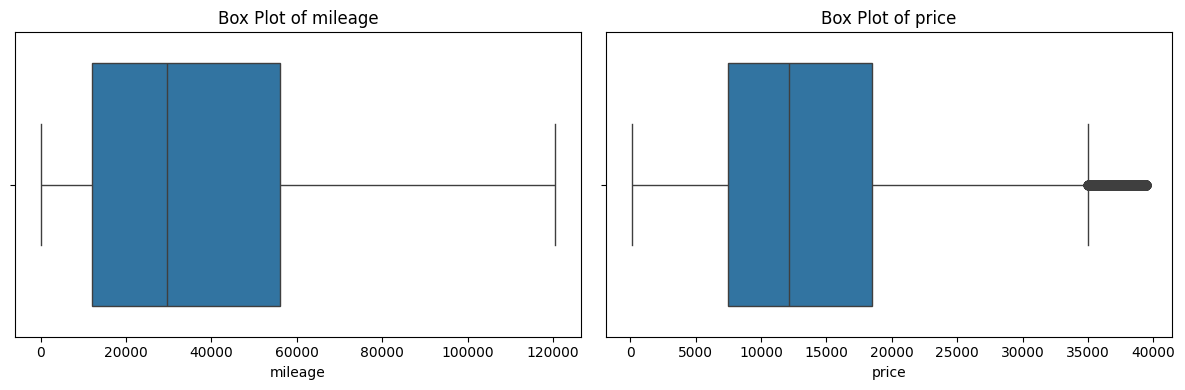

In [67]:
# Display boxplot for mileage and price
selection = ["mileage", "price"]

# Set up a 1x2 subplot layout
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# iterate over pair of aligned vectors
for i, column in enumerate(df[selection].columns):
  sns.boxplot(x=df[selection][column], ax=axes[i], showfliers=True)
  axes[i].set_title(f'Box Plot of {column}')
  axes[i].set_xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

In [69]:
# check data frame info after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366301 entries, 1 to 402004
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   mileage               366301 non-null  float64
 1   standard_colour       366301 non-null  object 
 2   standard_make         366301 non-null  object 
 3   standard_model        366301 non-null  object 
 4   vehicle_condition     366301 non-null  object 
 5   year_of_registration  366301 non-null  float64
 6   price                 366301 non-null  int64  
 7   body_type             366301 non-null  object 
 8   fuel_type             366301 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 27.9+ MB


In [110]:
#  split data frame into predictors and target; obtain train/validation/test folds)

# create catgorical, numerical and target objects
target = 'price'
cat_feat = ["standard_colour", "standard_make", "standard_model", "vehicle_condition", "body_type", "fuel_type"]
num_feat = ['mileage', "year_of_registration"]

# Select feature matrix and target vector
X = df[cat_feat + num_feat]
y = df[target]

# Split data to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)






In [111]:
def create_pp_pipeline(X, linear =False):
    """instantiate a preprocessing pipeline for numeric and categorical data
    using simple imputers, scalers, and encoders. It relies on latest versions
    of sklearn so as to produce pandas outputs.

    X: the dataset with the features (needed for feature names)

    returns the Pipeline object
    """

    num_features = X[["mileage"]].columns.tolist()

    numeric_transformer = Pipeline(
        steps=[
                ("imputer", SimpleImputer(strategy="mean"))
              ]
    )

    # add scaling/polynomial features if dealing with a linear model
    if linear:
        numeric_transformer.steps.extend([
            ("scaler", StandardScaler()),
            ('poly', PolynomialFeatures(include_bias=False))
                                        ])

    cat_features = X.drop(columns = "mileage").columns.tolist()
    categorical_transformer = Pipeline(
        steps=[
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", TargetEncoder(handle_unknown="ignore")),
              ]
    )

    preprocessor = ColumnTransformer(
        transformers=[
                       ("num", numeric_transformer, num_features),
                       ("cat", categorical_transformer, cat_features),
                     ],
        remainder='passthrough',
        verbose_feature_names_out=False
    )

    return preprocessor



In [112]:
# Instantiate the preprocessing pipeline
preprocessor1 = create_pp_pipeline(X_train)

# Step 2: Fit the preprocessing pipeline to your training data
preprocessor1.fit(X_train, y_train)


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['mileage']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  TargetEncoder(handle_unknown='ignore'))]),
                                 ['standard_colour', 'standard_make',
                                  'standard_model', 'vehicle_condition',
                                  'body_type', 'fuel_type',
                                  'year_of_registration'])],
                  verbose_feature_names_out=False)

In [113]:
X_test_encodedt = preprocessor1.transform(X_test)
X_test_encodedt

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,body_type,fuel_type,year_of_registration
62540,41743.0,11432.809040,11787.787798,9931.709071,13148.507738,10396.237461,14835.047744,11796.408859
350332,31661.0,14521.711488,16957.310116,27661.250934,13148.507738,17999.250921,14835.047744,16934.482951
294487,55.0,15629.763069,8274.780023,6852.830687,13148.507738,10396.237461,12356.780646,23177.838239
332559,63274.0,11432.809040,18461.493437,19286.736973,13148.507738,15069.228954,14835.047744,10217.363387
18312,85000.0,14521.711488,14102.702258,13670.130878,13148.507738,15069.228954,14835.047744,16934.482951
...,...,...,...,...,...,...,...,...
385586,80000.0,11932.942994,14102.702258,10133.113813,13148.507738,10396.237461,12356.780646,8079.311981
268202,39000.0,11432.809040,14652.565052,7080.348096,13148.507738,14187.547815,12356.780646,4398.010753
83034,25144.0,13291.887593,18461.493437,20817.517824,13148.507738,17999.250921,12356.780646,16934.482951
225432,65415.0,14521.711488,9139.753848,7981.893314,13148.507738,10396.237461,12356.780646,8668.690398


In [82]:
y.head()

1     7000
2    14000
3     7995
4    26995
5    29000
Name: price, dtype: int64